In [1]:
from projectq import MainEngine
from projectq.meta import Dagger
from projectq.ops import CNOT, H, X, Z, Rx, Measure, All
from projectq.backends import CircuitDrawer

In [2]:
draw_bnd = CircuitDrawer()
eng = MainEngine(draw_bnd)
qr = eng.allocate_qureg(2)

In [3]:
def compute_block(q):
    H | q[0]
    CNOT | (q[0],q[1])

In [4]:
compute_block(qr)

In [5]:
X | qr[0]

In [6]:
with Dagger(eng):
    compute_block(qr)

In [7]:
All(Measure) | qr

In [8]:
eng.flush()

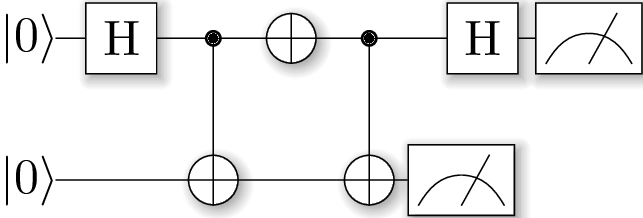

In [9]:
from subprocess import call
from IPython.display import Image

circName = 'meta_dagger_circ'

f = open(circName+'.tex','w')
f.write(draw_bnd.get_latex())
f.close()

call(['pdflatex', circName+'.tex'])
call(['convert', '-density', '450',circName+'.pdf', circName+'.png'])
call(['cp', circName+'.pdf', '../slides/pics'])

Image(circName+'.png')